In [64]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '58fdf887-0e5f-4f2a-bc35-81da84ce4bda',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-04-27T10:08:11.672Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9836}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11018, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [65]:
type(data)

dict

In [66]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [59]:
df=pd.json_normalize(data['data'])
df['time_stamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969082e+07,1.969082e+07,False,NaN,1,NaN,NaN,None,2024-04-27T10:00:00.000Z,62945.823850,2.350458e+10,-24.9527,-0.045029,-2.354513,-1.092211,-10.777269,11.123027,47.816684,1.239455e+12,53.4231,1.321862e+12,None,2024-04-27T10:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
1,1027,Ethereum,ETH,ethereum,8871,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.220513e+08,1.220513e+08,True,NaN,2,NaN,NaN,None,2024-04-27T09:59:00.000Z,3117.453208,1.062572e+10,-22.3855,0.164111,-1.008431,2.369708,-12.966213,-4.351203,35.827514,3.804891e+11,16.3989,3.804891e+11,None,2024-04-27T09:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
2,825,Tether USDt,USDT,tether,84229,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.105619e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-04-27T09:59:00.000Z,0.999547,4.363854e+10,-21.6490,0.021941,-0.045240,-0.091472,-0.032773,-0.087297,-0.053671,1.105118e+11,4.7630,1.130353e+11,None,2024-04-27T09:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-27 15:31:25.515773
3,1839,BNB,BNB,bnb,2152,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475881e+08,1.475881e+08,False,NaN,4,NaN,NaN,None,2024-04-27T09:59:00.000Z,594.457173,8.217448e+08,-21.5264,0.167838,-1.564385,6.931873,0.926358,48.946493,93.178091,8.773480e+10,3.7813,8.773480e+10,None,2024-04-27T09:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.471500e+08,5.747548e+08,True,NaN,5,NaN,NaN,None,2024-04-27T09:59:00.000Z,136.103023,2.495781e+09,-28.4810,-0.047147,-5.458098,-3.443108,-27.277764,22.331621,39.722431,6.085847e+10,2.6227,7.822586e+10,None,2024-04-27T09:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
5,3408,USDC,USDC,usd-coin,18714,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.346997e+10,3.346997e+10,False,NaN,6,NaN,NaN,None,2024-04-27T09:59:00.000Z,1.000162,6.004274e+09,-18.5699,0.026505,0.014484,0.008022,-0.014636,0.022760,-0.002109,3.347541e+10,1.4426,3.347541e+10,None,2024-04-27T09:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-27 15:31:25.515773
6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-04-27T10:00:00.000Z,0.514666,9.455191e+08,-27.8895,-0.009095,-1.761214,-1.033025,-17.474160,-8.615592,-3.425061,2.842803e+10,1.2252,5.146657e+10,None,2024-04-27T10:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.440544e+11,1.440544e+11,True,NaN,8,NaN,NaN,None,2024-04-27T10:00:00.000Z,0.144948,9.076206e+08,-13.0132,-0.097995,-4.044771,-4.306279,-28.293820,50.954573,79.763655,2.088035e+10,0.8999,2.088035e+10,None,2024-04-27T10:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
8,11419,Toncoin,TON,toncoin,298,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs..."

In [67]:
def api_runner():
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '58fdf887-0e5f-4f2a-bc35-81da84ce4bda',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df=pd.json_normalize(data['data'])
    df['time_stamp']=pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\Users\ASUS\Documents\API_new_dataset'):
        df.to_csv(r'C:\Users\ASUS\Documents\API_new_dataset',header='column_names')
    else:
        df.to_csv(r'C:\Users\ASUS\Documents\API_new_dataset',mode='a',header=False)


In [68]:
import os 
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-04-27T10:08:42.052Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9836}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11018, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [72]:
df_new=pd.read_csv(r'C:\Users\ASUS\Documents\API_new_dataset')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19690825.00000,19690825.00000,False,NaN,1,NaN,NaN,None,2024-04-27T10:00:00.000Z,62945.82385,23504577676.48942,-24.95270,-0.04503,-2.35451,-1.09221,-10.77727,11.12303,47.81668,1239455201914.56006,53.42310,1321862300853.61011,None,2024-04-27T10:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
1,1027,Ethereum,ETH,ethereum,8871,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122051274.32942,122051274.32942,True,NaN,2,NaN,NaN,None,2024-04-27T09:59:00.000Z,3117.45321,10625717566.11495,-22.38550,0.16411,-1.00843,2.36971,-12.96621,-4.35120,35.82751,380489136723.54199,16.39890,380489136723.53998,None,2024-04-27T09:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
2,825,Tether USDt,USDT,tether,84229,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,110561912301.67532,113086550461.62344,True,NaN,3,NaN,NaN,None,2024-04-27T09:59:00.000Z,0.99955,43638541013.68366,-21.64900,0.02194,-0.04524,-0.09147,-0.03277,-0.08730,-0.05367,110511793572.75696,4.76300,113035287291.07001,None,2024-04-27T09:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-27 15:31:25.515773
3,1839,BNB,BNB,bnb,2152,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147588085.73576,147588085.73576,False,NaN,4,NaN,NaN,None,2024-04-27T09:59:00.000Z,594.45717,821744765.84387,-21.52640,0.16784,-1.56438,6.93187,0.92636,48.94649,93.17809,87734796203.89095,3.78130,87734796203.89000,None,2024-04-27T09:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447149992.36629,574754767.98193,True,NaN,5,NaN,NaN,None,2024-04-27T09:59:00.000Z,136.10302,2495780582.58917,-28.48100,-0.04715,-5.45810,-3.44311,-27.27776,22.33162,39.72243,60858465522.69440,2.62270,78225861183.91000,None,2024-04-27T09:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
5,3408,USDC,USDC,usd-coin,18714,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33469972805.18776,33469972805.18776,False,NaN,6,NaN,NaN,None,2024-04-27T09:59:00.000Z,1.00016,6004273633.83406,-18.56990,0.02651,0.01448,0.00802,-0.01464,0.02276,-0.00211,33475406208.75714,1.44260,33475406208.76000,None,2024-04-27T09:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-27 15:31:25.515773
6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,None,2024-04-27T10:00:00.000Z,0.51467,945519118.52274,-27.88950,-0.00909,-1.76121,-1.03302,-17.47416,-8.61559,-3.42506,28428029161.89186,1.22520,51466568637.07000,None,2024-04-27T10:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-27 15:31:25.515773
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144054366383.70520,144054366383.70520,True,NaN,8,NaN,NaN,None,2024-04-27T10:00:00.000Z,0.14495,907620640.99519,-13.01320,-0.09799,-4.04477,-4.30628,-28.29382,50.95457,79.76365,20880351983.45341,0.89990,20880351983.45000,None,2024-04-27T10:00:0

In [71]:
pd.set_option('display.float.format', lambda x: '%.5f'%x)

In [73]:
df_new1=df_new.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                                       'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_new1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08620,-2.43056,-1.20190,-10.90130,11.23206,47.68476
Ethereum,0.26521,-1.13121,2.40283,-13.05258,-4.12335,35.84201
Tether USDt,-0.04030,-0.07208,-0.11238,-0.05215,-0.11217,-0.06731
BNB,0.10218,-1.84264,6.75829,0.87697,49.10610,93.11356
Solana,0.04198,-5.64020,-3.66750,-27.13091,22.36887,39.66214
USDC,-0.01668,-0.01412,-0.01639,-0.02907,0.01121,-0.00721
XRP,0.20301,-1.88437,-0.66471,-17.37809,-8.17193,-3.40795
Dogecoin,0.08432,-4.23504,-4.66991,-28.73057,52.61235,79.76783
Toncoin,-0.58436,-3.32141,-15.91551,7.15553,139.98242,147.13867


In [74]:
df_new2=df_new1.stack()

In [75]:
df_new2

name                                      
Bitcoin       quote.USD.percent_change_1h      0.08620
              quote.USD.percent_change_24h    -2.43056
              quote.USD.percent_change_7d     -1.20190
              quote.USD.percent_change_30d   -10.90130
              quote.USD.percent_change_60d    11.23206
              quote.USD.percent_change_90d    47.68476
Ethereum      quote.USD.percent_change_1h      0.26521
              quote.USD.percent_change_24h    -1.13121
              quote.USD.percent_change_7d      2.40283
              quote.USD.percent_change_30d   -13.05258
              quote.USD.percent_change_60d    -4.12335
              quote.USD.percent_change_90d    35.84201
Tether USDt   quote.USD.percent_change_1h     -0.04030
              quote.USD.percent_change_24h    -0.07208
              quote.USD.percent_change_7d     -0.11238
              quote.USD.percent_change_30d    -0.05215
              quote.USD.percent_change_60d    -0.11217
              quote.US

In [76]:
df_new3=df_new2.to_frame(name='values')
df_new3

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.08620
             quote.USD.percent_change_24h  -2.43056
             quote.USD.percent_change_7d   -1.20190
             quote.USD.percent_change_30d -10.90130
             quote.USD.percent_change_60d  11.23206
             quote.USD.percent_change_90d  47.68476
Ethereum     quote.USD.percent_change_1h    0.26521
             quote.USD.percent_change_24h  -1.13121
             quote.USD.percent_change_7d    2.40283
             quote.USD.percent_change_30d -13.05258
             quote.USD.percent_change_60d  -4.12335
             quote.USD.percent_change_90d  35.84201
Tether USDt  quote.USD.percent_change_1h   -0.04030
             quote.USD.percent_change_24h  -0.07208
             quote.USD.percent_change_7d   -0.11238
             quote.USD.percent_change_30d  -0.05215
             quote.USD.percent_change_60d  -0.11217
             quote.USD.percent_change_90d  -0.06731
BNB          quote.USD.percent_change_1h    0.10218
             quote.USD.percent_change_24h  -1.84264
             quote.USD.percent_change_7d    6.75829
             quote.USD.percent_change_30d   0.87697
             quote.USD.percent_change_60d  49.10610
             quote.USD.percent_change_90d  93.11356
Solana       quote.USD.percent_change_1h    0.04198
             quote.USD.percent_change_24h  -5.64020
             quote.USD.percent_change_7d   -3.66750
             quote.USD.percent_change_30d -27.13091
             quote.USD.percent_change_60d  22.36887
             quote.USD.percent_change_90d  39.66214
USDC         quote.USD.percent_change_1h   -0.01668
             quote.USD.percent_change_24h  -0.01412
             quote.USD.percent_change_7d   -0.01639
             quote.USD.percent_change_30d  -0.02907
             quote.USD.percent_change_60d   0.01121
             quote.USD.percent_change_90d  -0.00721
XRP          quote.USD.percent_change_1h    0.20301
             quote.USD.percent_change_24h  -1.88437
             quote.USD.percent_change_7d   -0.66471
             quote.USD.percent_change_30d -17.37809
             quote.USD.percent_change_60d  -8.17193
             quote.USD.percent_change_90d  -3.40795
Dogecoin     quote.USD.percent_change_1h    0.08432
             quote.USD.percent_change_24h  -4.23504
             quote.USD.percent_change_7d   -4.66991
             quote.USD.percent_change_30d -28.73057
             quote.USD.percent_change_60d  52.61235
             quote.USD.percent_change_90d  79.76783
Toncoin      quote.USD.percent_change_1h   -0.58436
             quote.USD.percent_change_24h  -3.32141
             quote.USD.percent_change_7d  -15.91551
             quote.USD.percent_change_30d   7.15553
             quote.USD.percent_change_60d 139.98242
             quote.USD.percent_change_90d 147.13867
Cardano      quote.USD.percent_change_1h    0.13096
             quote.USD.percent_change_24h  -3.10542
             quote.USD.percent_change_7d   -6.46128
             quote.USD.percent_change_30d -30.07085
             quote.USD.percent_change_60d -26.74760
             quote.USD.percent_change_90d  -8.66883
Shiba Inu    quote.USD.percent_change_1h   -0.05077
             quote.USD.percent_change_24h  -5.38150
             quote.USD.percent_change_7d    7.40686
             quote.USD.percent_change_30d -21.27563
             quote.USD.percent_change_60d 135.10783
             quote.USD.percent_change_90d 166.26811
Avalanche    quote.USD.percent_change_1h    0.17829
             quote.USD.percent_change_24h  -3.90964
             quote.USD.percent_change_7d   -3.83476
             quote.USD.percent_change_30d -37.37256
             quote.USD.percent_change_60d -13.40447
             quote.USD.percent_change_90d  -6.12445
TRON         quote.USD.percent_change_1h   -0.12052
             quote.USD.percent_change_24h   1.54294
             quote.USD.percent_change_7d    9.61993
             quote.USD.percent_change_30d

In [77]:
df_new4=df_new3.reset_index()
df_new4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08620
1,Bitcoin,quote.USD.percent_change_24h,-2.43056
2,Bitcoin,quote.USD.percent_change_7d,-1.20190
3,Bitcoin,quote.USD.percent_change_30d,-10.90130
4,Bitcoin,quote.USD.percent_change_60d,11.23206
5,Bitcoin,quote.USD.percent_change_90d,47.68476
6,Ethereum,quote.USD.percent_change_1h,0.26521
7,Ethereum,quote.USD.percent_change_24h,-1.13121
8,Ethereum,quote.USD.percent_change_7d,2.40283
9,Ethereum,quote.USD.percent_change_30d,-13.05258


In [78]:
df_new5=df_new4.rename(columns={'level_1':'percentage_change'})
df_new5

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08620
1,Bitcoin,quote.USD.percent_change_24h,-2.43056
2,Bitcoin,quote.USD.percent_change_7d,-1.20190
3,Bitcoin,quote.USD.percent_change_30d,-10.90130
4,Bitcoin,quote.USD.percent_change_60d,11.23206
5,Bitcoin,quote.USD.percent_change_90d,47.68476
6,Ethereum,quote.USD.percent_change_1h,0.26521
7,Ethereum,quote.USD.percent_change_24h,-1.13121
8,Ethereum,quote.USD.percent_change_7d,2.40283
9,Ethereum,quote.USD.percent_change_30d,-13.05258


In [79]:
df_new5['percentage_change']=df_new5['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                                       'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df_new5
                                                                  

,name,percentage_change,values
0,Bitcoin,1h,0.08620
1,Bitcoin,24h,-2.43056
2,Bitcoin,7d,-1.20190
3,Bitcoin,30d,-10.90130
4,Bitcoin,60d,11.23206
5,Bitcoin,90d,47.68476
6,Ethereum,1h,0.26521
7,Ethereum,24h,-1.13121
8,Ethereum,7d,2.40283
9,Ethereum,30d,-13.05258


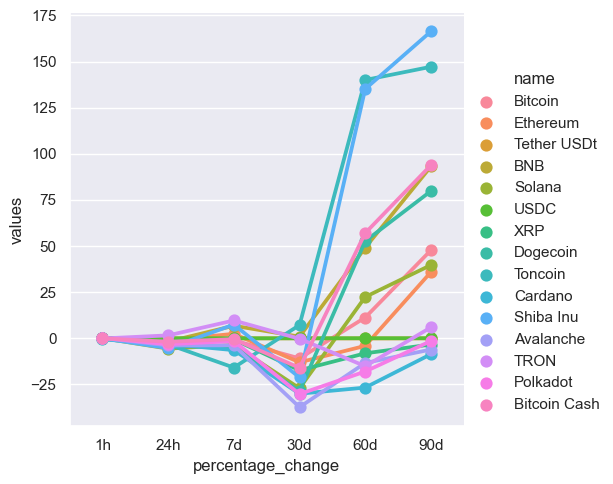

In [80]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.catplot(x='percentage_change',y='values',hue='name',data=df_new5,kind='point')

<Axes: xlabel='time_stamp', ylabel='quote.USD.price'>

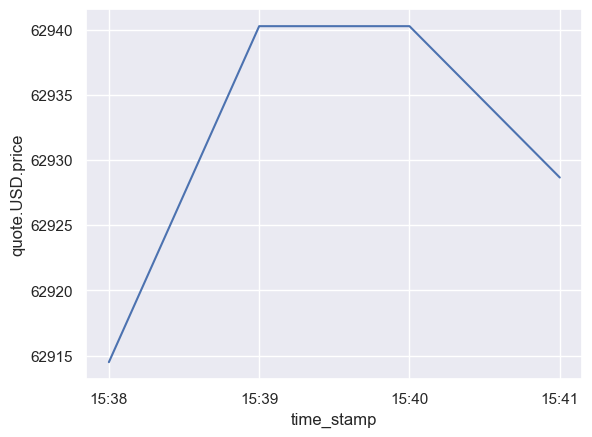

In [104]:
df_another_vis=df_new[['name','quote.USD.price','time_stamp']]
df_another_vis=df_new.query("name == 'Bitcoin'")
df_another_vis.loc[df_another_vis['time_stamp'].isin(['2024-04-27 15:38:42.548758','2024-04-27 15:39:46.035140','2024-04-27 15:40:47.679437','2024-04-27 15:41:49.634025']), 'time_stamp'] = ['15:38','15:39','15:40','15:41']

sns.set_theme(style="darkgrid")
sns.lineplot(x='time_stamp', y='quote.USD.price', data = df_another_vis)
